In [1]:
#Pymaceuticals Inc.
# Analysis
# Of the data present at least three conclusions can be drawn:
# 1. Ramican had the largest impact on the tumors having the lowest tumor average and the lowest tumor standard variation.
# 2. There is a strong relationship between weight and tumor size for mice on Capomulin. That is, the lower the weight of the mouse the lower the average tumor size.
# 3. The data maybe skewed in favor of Ramican and Capomulin since far more mice were tested on those regiments than on any of the other drugs on the list, close to 50 mice extra for both.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
 # Checking the number of mice.
mice_count = len(pd.unique(study_data_complete['Mouse ID']))
mice_count

249

In [4]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate=study_data_complete[study_data_complete.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse = duplicate.iloc[0,0]
duplicate_mouse

'g989'

In [5]:
 # Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mouse = study_data_complete.loc[study_data_complete['Mouse ID']=='g989']
all_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/
study_data_complete = study_data_complete.loc[(
    study_data_complete["Mouse ID"] != 'g989')]
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(pd.unique(study_data_complete['Mouse ID']))
new_mice_count

248

In [8]:
# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# https://www.w3schools.com/python/pandas/ref_df_std.asp#:~:text=The%20var()%20method%20calculates,the%20variance%20for%20each%20row.
tumor_mean = study_data_complete.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = study_data_complete.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_variance = study_data_complete.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std_dev = study_data_complete.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_std_em = study_data_complete.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

drug_tumor_summary = pd.DataFrame({'Mean Tumor Volume':tumor_mean,
                                   'Median Tumor Volume':tumor_median,
                                   'Tumor Volume Variance':tumor_variance,
                                   'Tumor Volume Std. Dev.':tumor_std_dev,
                                   'Tumor Volume Std. Err.':tumor_std_em})

drug_tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/
# Using the aggregation method, produce the same summary statistics in a single line.
agg_drug_tumor_summary = study_data_complete.groupby('Drug Regimen')[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem'])
agg_drug_tumor_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
#  Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

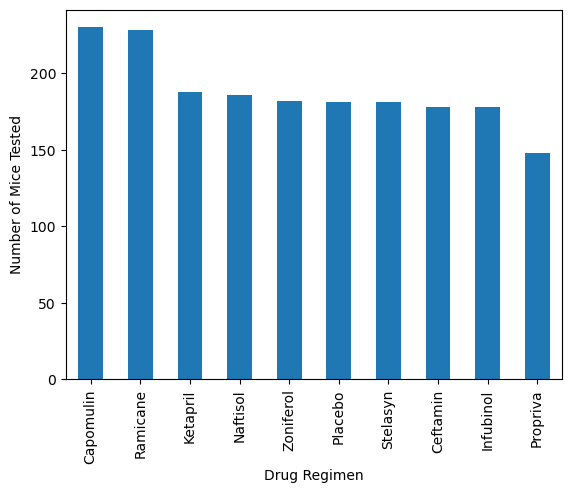

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# How to write a bargraph in pandas = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# How to sort in pandas = https://realpython.com/pandas-sort-python/
# How to set titles in pandas = https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
timepoint_total = study_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_total = timepoint_total.sort_values(ascending=False)
total_mouse_drug = timepoint_total.plot.bar(rot=90)
total_mouse_drug.set_ylabel('Number of Mice Tested')

total_mouse_drug

In [13]:
# Making a dataframe out of the timepoint_total count
bar_total = pd.DataFrame(timepoint_total)


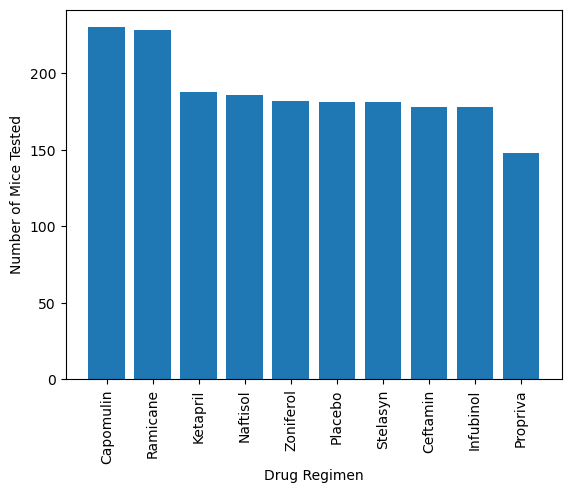

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(bar_total.index,bar_total['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


<AxesSubplot:ylabel='Sex'>

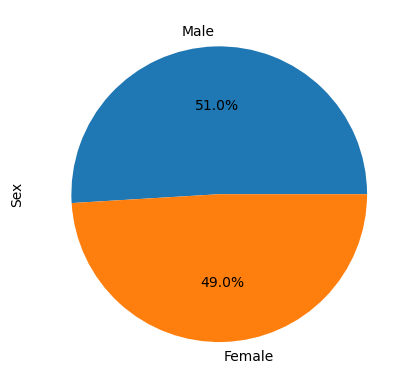

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_total = study_data_complete.groupby(['Sex'])['Mouse ID'].count()
sex_total = sex_total.sort_values(ascending=False)
MF_mouse = sex_total.plot.pie(y = "Sex",autopct='%1.1f%%')

MF_mouse.set_ylabel('Sex')

MF_mouse


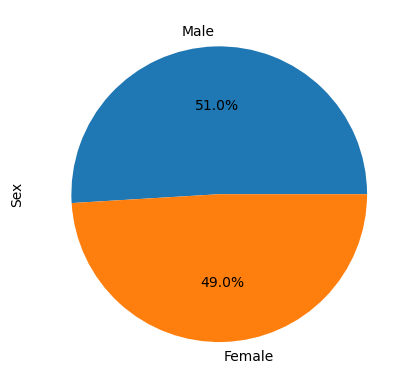

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_complete = pd.DataFrame(sex_total)

sex_complete

plt.pie(sex_complete['Mouse ID'],labels = sex_complete.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


In [17]:
#  Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# How to merge dataframes - https://pandas.pydata.org/docs/user_guide/merging.html
capo_df = study_data_complete.loc[study_data_complete['Drug Regimen']== 'Capomulin']
rami_df = study_data_complete.loc[study_data_complete['Drug Regimen']== 'Ramicane']
infu_df = study_data_complete.loc[study_data_complete['Drug Regimen']== 'Infubinol']
ceft_df = study_data_complete.loc[study_data_complete['Drug Regimen']== 'Ceftamin']

drugs = [capo_df,rami_df,infu_df,ceft_df]
quart_drugs = pd.concat(drugs)

# Start by getting the last (greatest) timepoint for each mouse
greatest_time=study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
# combine drug df's with max time df
drug_time_study=pd.merge(quart_drugs,greatest_time, on='Mouse ID')
# find where both the timepoint and the max timepoint meet
drug_time_study['Final Time'] = drug_time_study["Timepoint_x"] == drug_time_study["Timepoint_y"]
# remove any place that the time is not the final timepoint for each mouse
drug_time_study.drop(drug_time_study.loc[drug_time_study['Final Time']==False].index, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# make a clean df with only the drug, mouse, time, and tumor volume
drug_tumor = drug_time_study[['Mouse ID','Drug Regimen','Timepoint_x','Tumor Volume (mm3)']]


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# finding out the meaning of IQR - https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr#:~:text=To%20find%20the%20interquartile%20range,difference%20between%20Q3%20and%20Q1.

for drug in treatments:
    #Locate the rows which contain mice on each drug and get the tumor volumes
    tvolume = drug_tumor.loc[drug_tumor['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(tvolume)
    
    # add subset    
    quartile = tvolume.quantile([0.25,0.5,0.75])
    bottom = quartile[0.25]
    top = quartile[0.75]
    
    # Determine outliers using upper and lower bounds
    iqr = top - bottom
    
    lower_bound = bottom - (1.5*iqr)
    upper_bound = top + (1.5*iqr)
    
    outliers = tvolume.loc[(tvolume>upper_bound)| (tvolume<lower_bound)]
    if len(tvolume)>0:
        print(f'{drug}s potential outliers: {outliers}')



Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 459    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


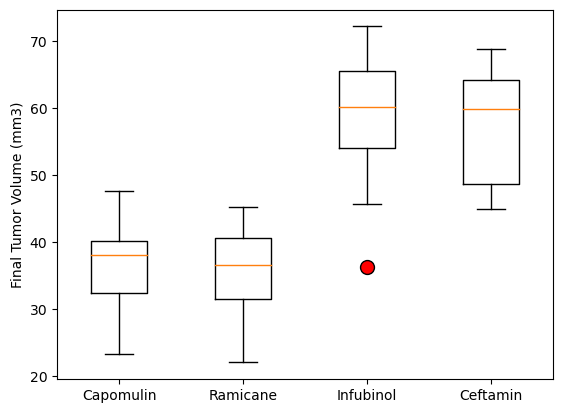

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# How to color an outlier - https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
plt.boxplot(tumor_vol_data,labels = treatments, flierprops={'marker':'o', 'markersize':10,'markerfacecolor':'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


In [21]:
# Line and Scatter Plots

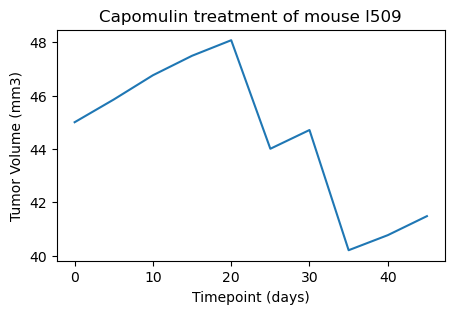

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I509
mouse_l509=capo_df.loc[capo_df['Mouse ID']=='l509']
mouse_l509.plot(kind="line",x='Timepoint',y='Tumor Volume (mm3)',figsize = (5,3),legend = False)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
    

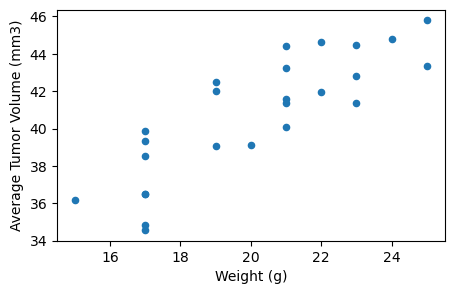

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group capomulin df by mouse
capo_mouse=capo_df.groupby('Mouse ID')
# Find the average weight and tumor size per mouse
weight = capo_mouse['Weight (g)'].mean()
average_tumorv = capo_mouse['Tumor Volume (mm3)'].mean()
# Make a new dataframe with the mouseid, weight, and tumor size
capo_mouse_df=pd.DataFrame({'Weight (g)':weight, 'Average Tumor Volume (mm3)':average_tumorv})
# plot the DF

capo_mouse_df.plot(kind= "scatter",x='Weight (g)', y='Average Tumor Volume (mm3)',figsize=(5,3))
plt.show()
                  


In [24]:
 # Correlation and Regression

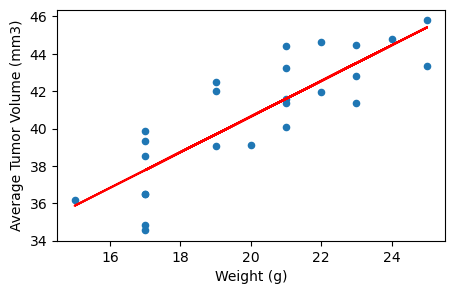

The correlation between mouse weight and the average tumor volume is 0.84


In [25]:
# Calculate the correlation coefficient and linear regression model
# lineregression - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
xweight= capo_mouse_df['Weight (g)']
yatv= capo_mouse_df['Average Tumor Volume (mm3)']

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(xweight,yatv)
regresslin = xweight*slope+intercept
line_eq = "y = "+str(round(slope,2)) + "x +"+str(round(intercept,2))

capo_mouse_df.plot(kind= "scatter",x='Weight (g)', y='Average Tumor Volume (mm3)',figsize=(5,3))
plt.plot(xweight,regresslin,"r-")
plt.show()

print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(xweight,yatv)[0],2)}')


